<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/From_GAN_to_WGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **From GAN to WGAN**

논문 링크: https://arxiv.org/abs/1904.08994

본 논문은 GAN이 수학적으로 왜 학습하기 힘든지, 그리고 이러한 어려움을 극복하기 위해 수정된 GAN에 대해서 설명한다. 나는 이 논문이 WGAN 논문을 서포팅하는 논문이라고 생각한다. WGAN엔 여러 수식과 증명이 많기 때문에 이번엔 보다 **설명을 간단하고 쉽게 이해할 수 있도록 정리**하여 논문에 나온 WGAN 뿐만아니라 추가적으로 WGAN-GP의 이해를 쉽게 할 수있도록 했다.

만일 WGAN 논문에 대해 알고 싶다면: 

https://github.com/viriditass/Papers/blob/main/Wasserstein_GAN.ipynb

만일 정보이론(Information Theory)에 대해 자세히 알고 싶다면: 

https://github.com/viriditass/Miscellaneous/blob/main/Information_Theory.ipynb (Entropy, Cross Entropy, KL-divergence에 대해 나와있다.)

## **KULLBACK-LEIBLER DIVENGENCE**

KL Divergence는 놀람의 정도라고 생각하면 된다.

A팀과 B팀이 야구 경기를 했을때, 만일 A팀이 이겼다해도 이것은 놀라운 정보는 아니다. 하지만 만약 약팀인 B팀이 A팀을 이겼다고하면 이는 놀라운 정보이다.

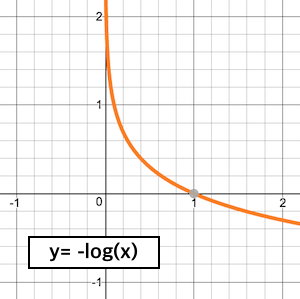

보통 h(x) = -logP(x)로 표현한다. 여기서 P(x)는 확률 분포에서의 값 0~1 사이의 실수이다.

정보이론(Information Theory)에서 entropy 개념dms 놀람의 정도의 평균(기대값), 불확실성의 정도라고 표현한다. Entropy = E[-logP(x)]

KL-divergence는 **상대적인 entropy**이다.

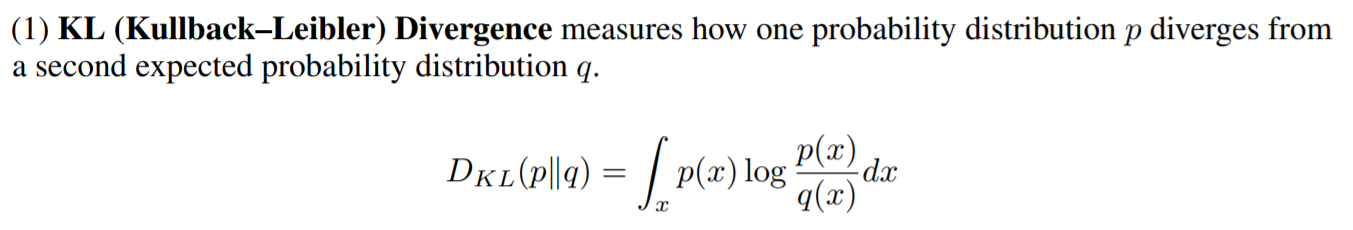

p(x)와 q(x)가 같을때 0으로 최솟값을 갖는다.

여기서 p(x)가 0에 가까워지면 q(x)의 효과가 무시가 된다. (당연히 분자가 0이면 분모에 상관없이 0를 갖는다. 이 경우 분포사이의 유사성 측정이 힘들어진다.)

## **JENSEN-SHANNON DIVERGENCE**

위의 KL-divergence의 문제를 해결하기 위해 나온게 바로 JS-divergence다.

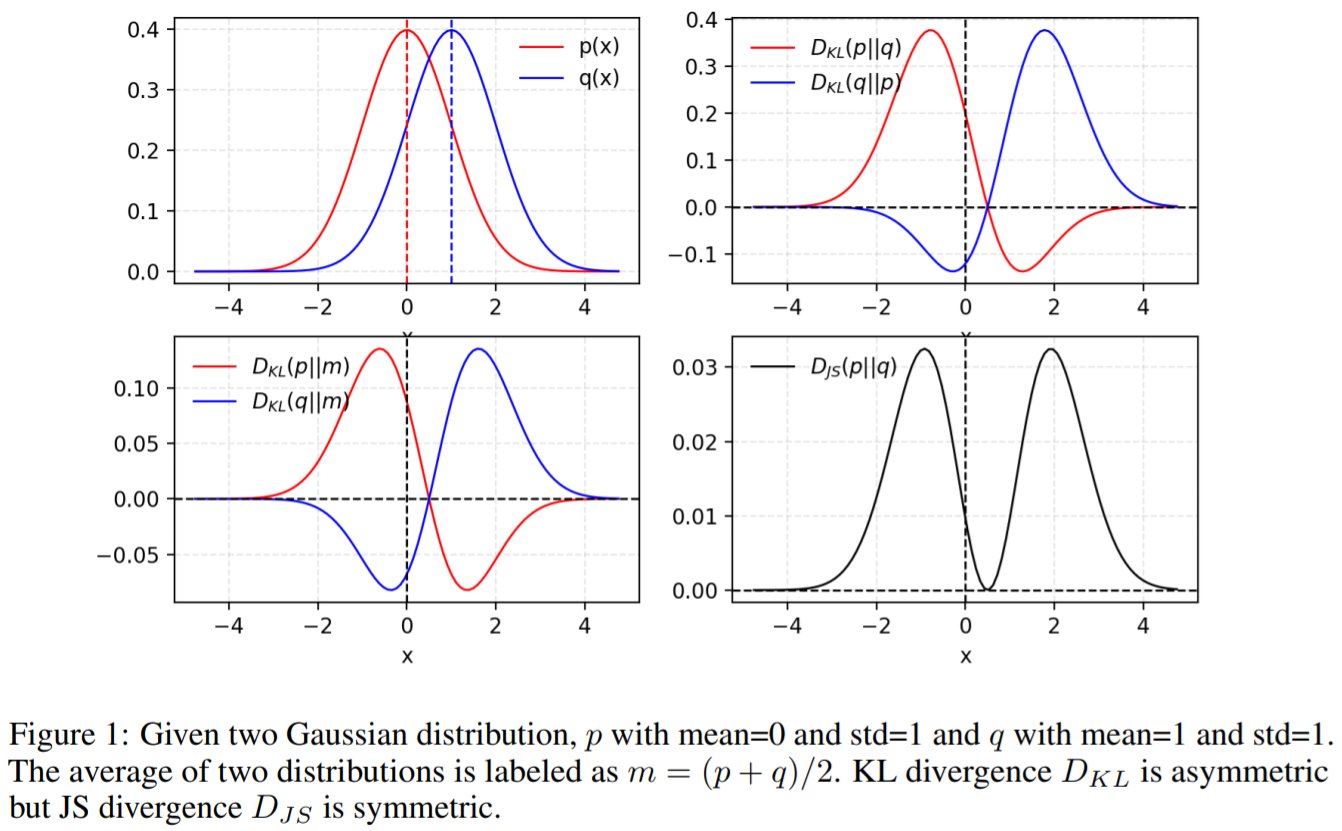

JS-divergence는 [0, 1]범위로 한정되어 있고, 위의 그림 Figure 1을 보면 알 수 있듯이 **대칭적**이며, 부드럽다.

맨 위의 링크에서 정보이론(Information Theory)를 성명해놓은 글을 보면 알 수 있듯이, JS-divergence는 **거리 개념**이라고 생각하면 된다.

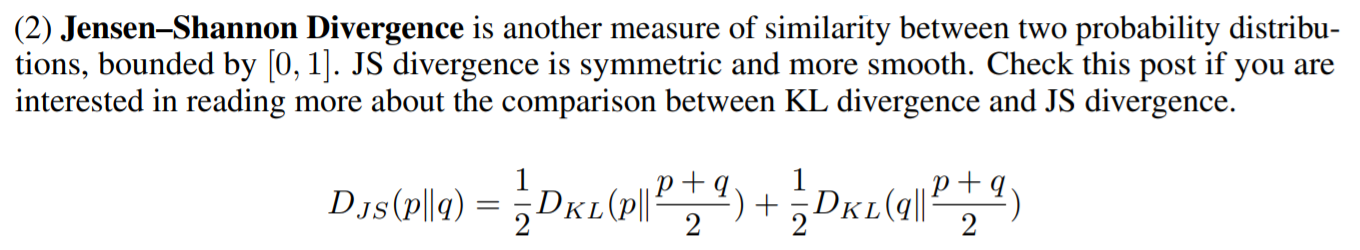

GAN의 loss function을 최적화하는 것은 D(JS)를 최적화 하는 것과 같다. **GAN이 성공할 수 있었던 것은 D(KL)대신 D(JS)를 사용해서라는 말이 나올 정도다.**

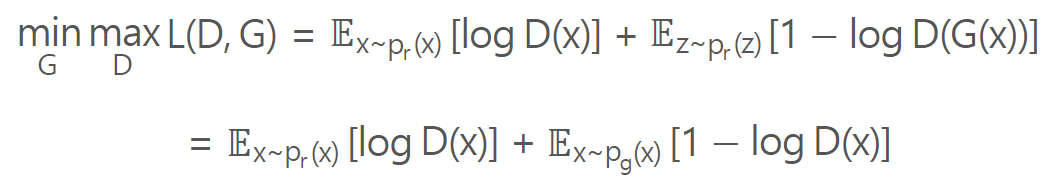

그 이유를 설명하기 위해 기본 GAN의 loss function을 봐보겠다. 기존 E(z~pr(z))[1 - logD(G(x))]를 

아래와 같이 E(x~pg(x))[1 - logD(x)]로 바꿨다.

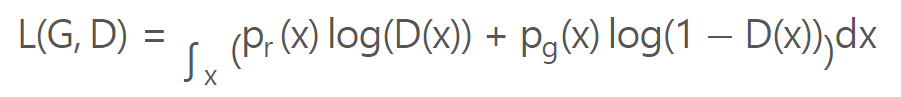

또한 식을 더 정리하면 위의 식과 같이 되는데, 이는 y = alog(y) + blog(1 - y)형태이다. a,b ∈ R^2와 y ∈ [0, 1]에 대해 최댓값은 a / (a + b)이다.

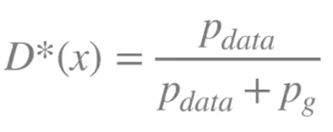

따라서 최적의 Discriminator의 최댓값은 위와 같이 된다.

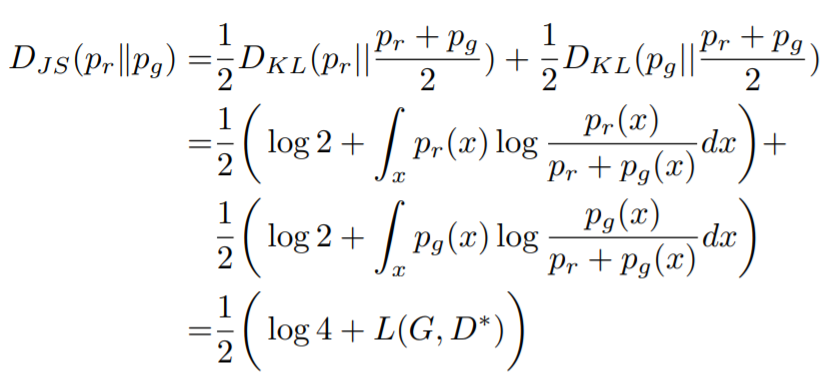

이 값을 다시 loss에 넣어서 전개를 하면 위와 같이 전개가 되는데

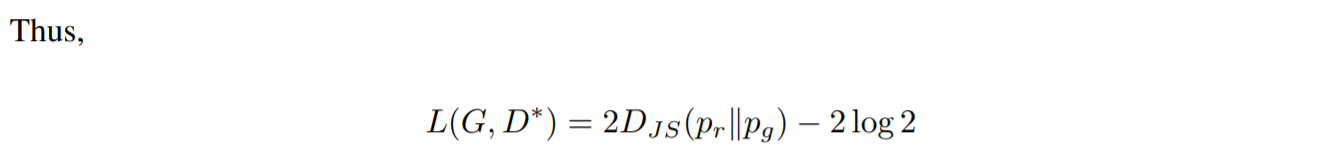

즉, L를 최소화하는 것은 D(JS)를 최대화하는 것이다. (쉽게 해석하자면 실제 분포와 가짜 분포의 거리를 최대화하는 것이다.)

최적의 Generator G*(x)는 p(g) = p(data)가 되어야 하므로 D(JS)를 최소화하는 것이다. 최적의 Generator에서 p(g) = p(data)라 했으므로

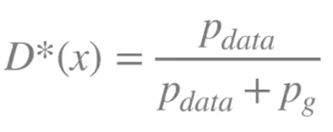

여기 식에 대입을 하면 D*(x) = 1 / 2가 된다.

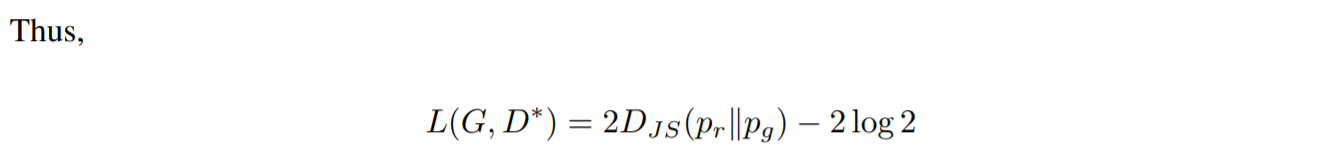

그러면 또 다시 정리하자면, 최적의 값 L(D*)은 -2log2가 된다.

## **Problems**

### **Hard to Achieve Nash Equilibrium**

Generator는 D(JS)를 최소화하려고 하며, Discriminator는 D(JS)를 최대화하려고 한다. 이는 즉, 두 모델이 서로 협력하지 않으며 **Nash Equilibrium**을 찾기 위해 학습된다. 하지만 다른 모델의 loss function에는 상관없이 독립적으로 모델이 update된다. 왜냐하면 동시에 두 모델의 gradient를 update하는 것은 수렴을 장담하지 못하기 때문이다.

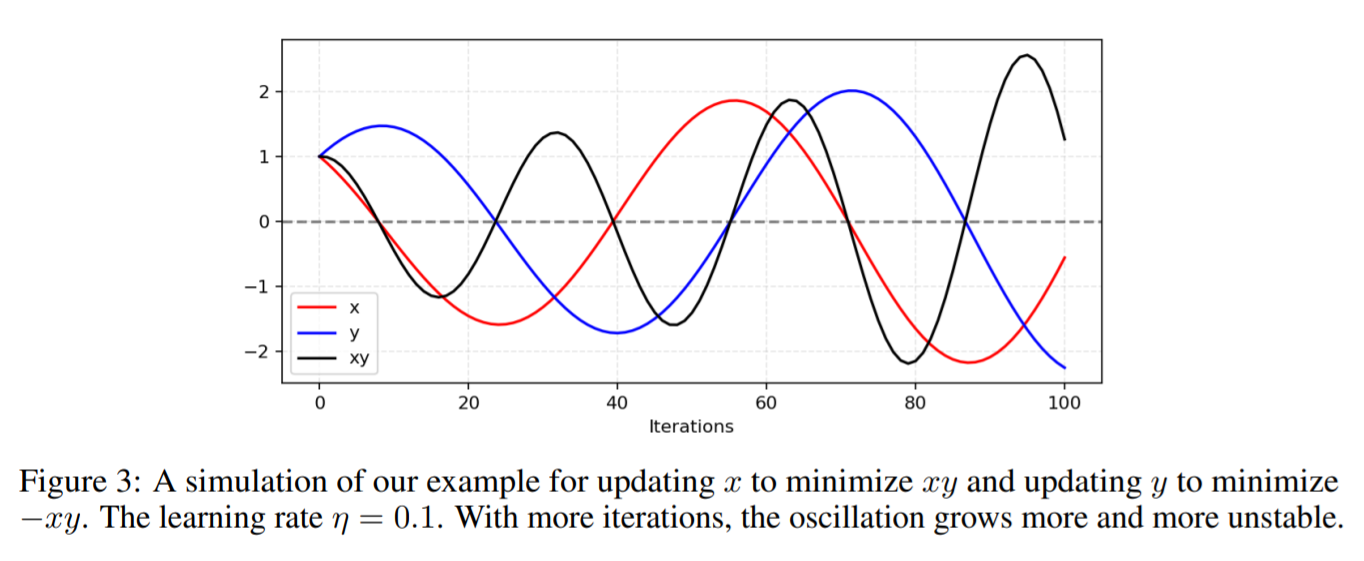

예를 들어보겠다. 한 플레이어 x는 f1(x) = xy를 최소화하려고 하고, 그떄 다른 플레이어 y는 f2(y) = -xy를 최소화하려고 한다고 가정하겠다. 이를 gradient를 구하기 위해 편미분을 하면 Δf1 / Δx = y, Δf2 / Δy = -x이다. 그리고 x를 x - lr(learning rate) * y,

y를 y + lr * x를 이용해 동시에 업데이트하면 위의 그림 Figure3과 같이 된다. **모든 gradient update가 큰 진동과 불안정성을 초래한다는 것을 볼 수 있다!**

최종적으로 왜 GAN이 train하기 힘든지에 대해 정리를 해보겠다. 

**discriminator의 성능이 나쁘면, discriminator가 정확한 피드백을 하지 못한다. 그리고 손실함수가 현실을 반영하지 못한다.**

**반면 discriminator의 성능이 너무 좋으면, loss function이 0에 가까워지고 gradient가 generator에 도달하기 전에 gradient vanishing 문제가 발생한다. 그래서 핛브이 매우 느려지거나 불가능해진다.**

## **WASSERSTEIN**

위에서 본 것처럼 GAN문제는 D(JS)를 최대화하거나, D(JS)를 최소화하거나 하는 문제로 볼 수 있는데, **WASSERSTEIN에서는 거리 개념이 아니라 다른 개념으로 바꾼다. EMD(earth move distance)로 바꿔서 새롭게 정의되는 loss function을 적용한 것이 바로 WGAN**이다.

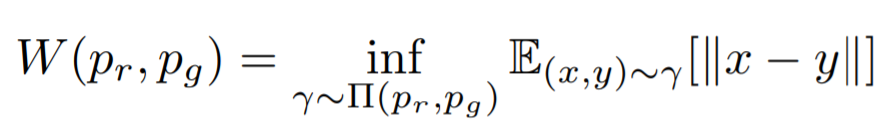

위의 식이 Wasserstein distance의 식이다.

해당 식에서 γ(x,y)는 질량을 나타내고, ||x - y||는 거리를 나타낸다. 즉, **질량과 거리만큼 이동해서 드는 힘의 총량이 바로 Wasserstein 거리**라고 생각하면 된다.

Π(pr,pg)는 pr과 pg 사이에서 가능한 모든 결합 분포이며, 그리고 이 모든 결합분포에서 하나 뽑아낸 것이 γ(x,y)이다. 

γ(x,y)는 엄첨 많이 sampling할 수 있다. inf는 하한값(greatest lower bound)값이다. EMD(earth move distance)에서 가장 작은 비용이 wasserstein-1이다.

### **Use Wasserstein Distance as GAN Loss Function**

이제 GAN에서 실제 wasserstein을 적용하는 것을 알아보겠다.

**먼저, EMD에서 generator의 분포와 real data의 분포를 결합해서 만든 Π(pr,pg)의 모든 결합 분포를 추적하기는 불가능하다.**

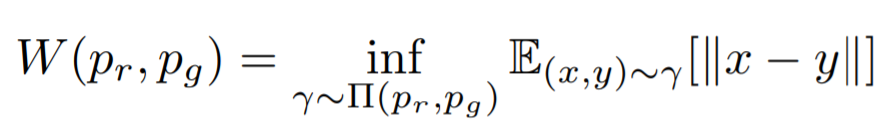

따라서 위의 식인 EMD식을 그대로 쓰지 않고 **Kantorovich-Rubinstein duality**를 사용했다.

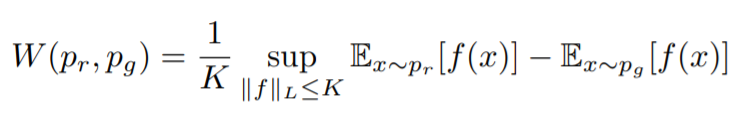

항을 하나하나 살펴보자면, f는 ||f||(L) <= K 즉, f의 거리는 k보다 작거나 같음을 만족해야 한다. 이는 **k-lipschitz continuous를 만족한다는 의미인데, 모든 (x1, x2)와 Lipschitz 상수 K에 대해 |f(x1) - f(x2)| <= K|x1 - x2|를 만족해야 거의 모든 점에서 연속적으로 미분이 가능하다.**

K = 1이므로, f는 ||f||(L) <= 1를 만족해야한다. 정리하면 |f(x1) - f(x2)| <= |x1 - x2|는 |f(x1) - f(x2)| / |x1 - x2| <= 1이므로 f는 임의의 두 점 사이 변화율이 1을 넘지 않는 함수이다.

위의 식에서 sup는 inf의 반대이다. 그리고 KR(p, q) <= W(p, q)인데 (kantorovich <= wasserstein는 공식으로 생각하면 된다.) 즉, wasserstein을 그대로 못쓰므로 wasserstein 이하인 KR을 사용해 상한(upper bound)을 구한다. 즉, f를 구하면 EMD를 구할 수 있지만, f를 구하는 것이 불가능하므로 NN으로 근사하는 값을 구한다.

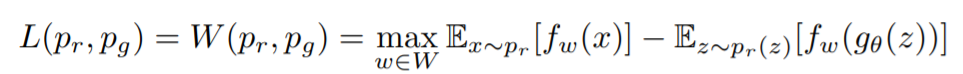

그래서 최종적으로 위와 같은 식이 된다. weight에 대해 NN인 fw를 update하여 근사하는 것이다.

하지만, 아직 **||f||(L) <= 1**이라는 제약이 남는다. WGAN에서는 이를 **가중치 w를 [-0.01, 0.01]로 제한하여 구할 수 있는 모든 공간 W가 compact parameter 공간**이 된다. 이러면 f(W)에 상한과 하한이 생기면서 제약을 만족시키게 된다.

개인적으로 좀 Terrible 방법이라고 생각한다. 이는 뒤에서 더 다뤄보겠다.

**Loss function**을 이제 각각 generator입장과 discriminator입장에서 각각 봐보겠다.

#### **Dicriminator의 입장**

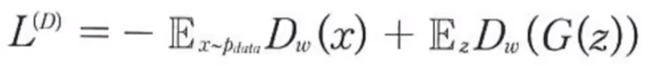

**Discriminator**는 wasserstein의 거리를 최대한 벌리고 싶어한다.

즉, -wasserstein을 최소화한다고 생각하면 된다.

#### **Generator의 입장**

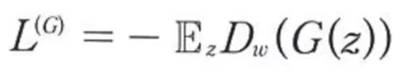

반대로 **Generator**는 wasserstein의 거리를 최소화하고 싶어한다.

#### **Train**

실제 학습 과정의 경우는 **generator 가중치 1회 학습전에 discriminator 가중치 w를 num_critic회(본 논문에서는 5) 훈련한다. 그리고 Generator를 학습한다.** 그 이유는 WGAN에서는 discriminator가 먼저 최적화되어도 유의미한 gradient를 생성하기 때문이다.

하지만 Adam과 같은 Momentum-based optimizer의 경우 불안정하여 RMSProp을 사용했다.

## **WGAN-GP**

이런 경우 WGAN의 가중치는 clipping boundary 근처로 몰린다. (weight clipping 때문이다.) 이를 다른 방법으로 해결한 것이 WGAN-GP이다.

**weight clipping으로 인해 weight가 clipping boundary 근처로 몰리게 된다. 그래서 WGAN-GP에서는 weight clipping을 대체하기 위해 Gradient penalty를 주게 된다.**

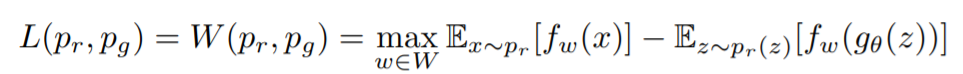

위 식에서 max로 만드는 f를 f*이라고 하면

위와 같은 식이 된다. 정리하면 x는 generator가 생성한 이미지에서 sampling을 하고 y는 real data에서 sampling을 한다.

x와 y를 보간한 직선 중 x와 y 사이의 점 xt는 xt = tx + (1 - t)y이다. 그리고 t의 범위는 0<=t<=1인데, 여기서 norm[Δf*(xt) = y - xt / ||y - xt||] = 1을 만족함이 증명된다.

즉, f가 최적해 f*의 특성을 가지도록 근사하게 weight를 update하면 된다.

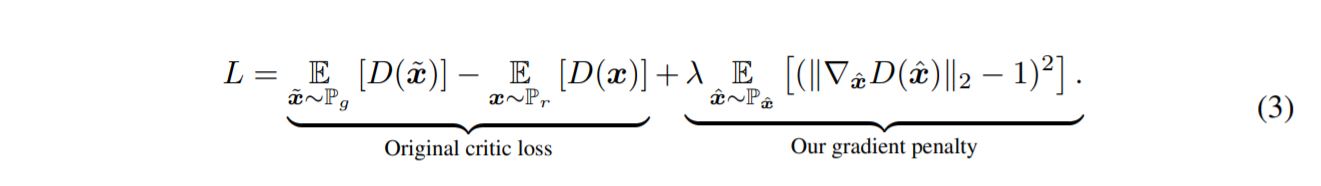

식을 정리하면 이렇게 되는데, 여기서 람다가 이 조건을 얼마의 세기를 할지 정하는 hyper-parameter가 된다.

결과적으로 이렇게 식을 바꿈으로써 Adam을 사용할 수 있고, 더욱 안정적인 학습이 가능하다.

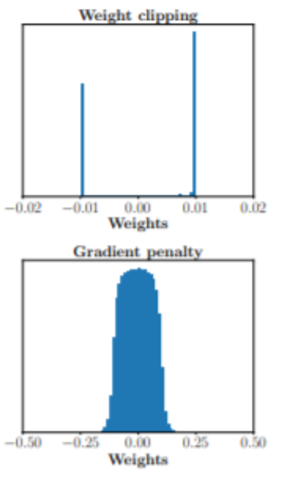

뿐만 아니라 weight clipping과 비교하여 가중치 값들이 의미있는 값을 가지게 된다.

## **Why Wasserstein is better than JS or KL Divergence?**

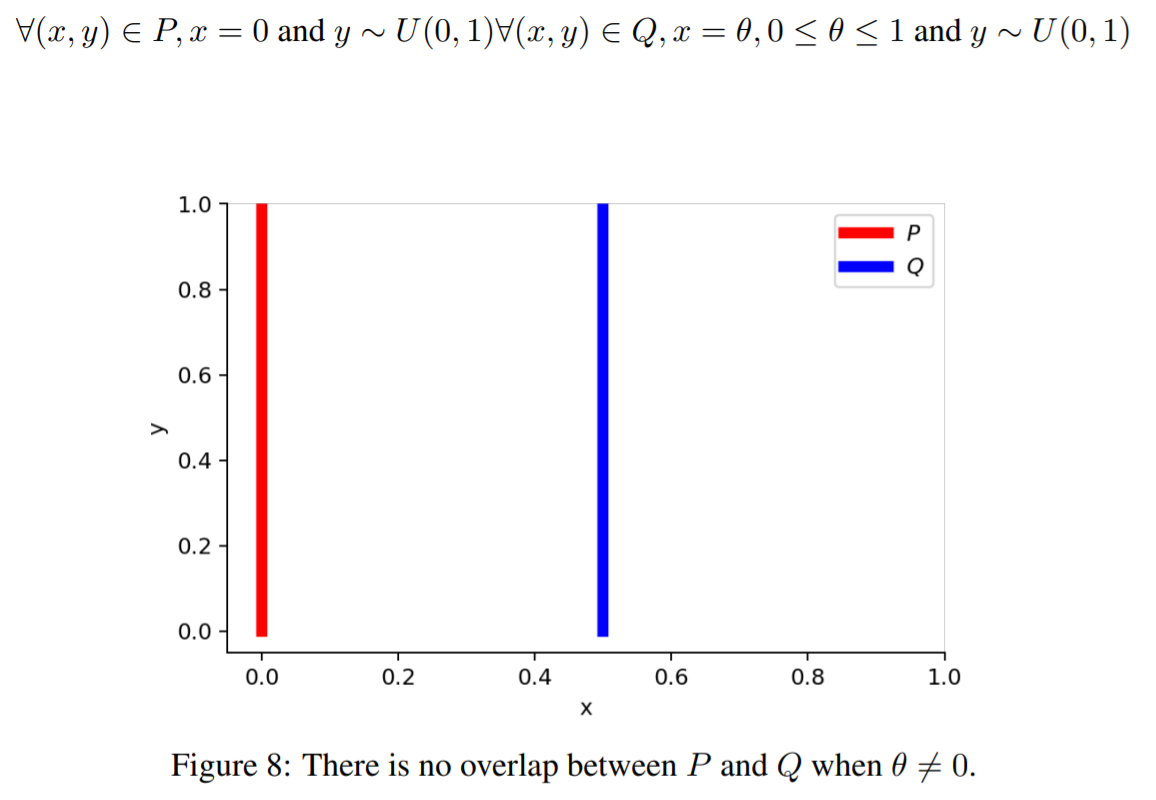

만일 두 분포가 겹치는 부분이 적거나 없으면 Divergence 계산이 어렵다.

예시를 하나 들어보자, P는 x = 0이고, y값은 균등분포(uniform distribution) 즉, U(0,1)이라고 하겠다. Q는 x = Θ(위의 그림 Figure 8에서는 0.5)이고, y 값은 P와 마찬가지로 0과 1 사이의 균등분포라고 하겠다.

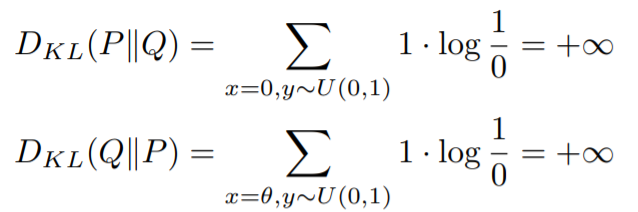

**Θ가 0이 아니면, 두 분포가 아예 겹치지 않는다. 이때 KL-divergence를 구하면 위와 같은 식이 나온다.** 즉, 둘다 무한대로 발산해버리므로 유의미한 피드백을 받기 어렵다.

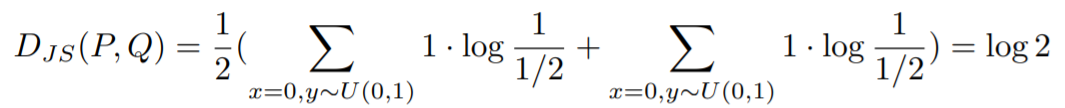

이때 JS값을 구해보면 위와 같이 log2라는 값이 나오긴 하지만 상수가 나온다. 즉, **gradient descent할때 아무 도움이 되지 않는다.**

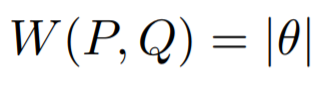

**반면 Wasserstein 혹은 EMD의 경우는 절대값 Θ를 가지기 때문에, 안정적인 경사 하강이 가능하다.**